# PROJET 7: IMPLEMENTEZ UN MODELE DE SCORING

PARTIE MODELISATION

# PACKAGES, METRICS, MODELS

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1. PACKAGES
# -----------------------------------------------------------
# Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from lightgbm import LGBMClassifier

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import pandas as pd
import seaborn as sns
import time, pickle

from zipfile import ZipFile

#Preprocessing, Upsampling, Model Selection, Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.labelsize': 15,
     'legend.fontsize': 15,
     'axes.titlesize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

# IMPORT DATA

In [6]:
data_train = pd.read_csv(('data_train.csv'), index_col='SK_ID_CURR', encoding ='utf-8')

In [7]:
data_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_OUTLIERS,PREVIOUS_LOANS_COUNT,PREV_BUR_MEAN_DAYS_CREDIT,PREV_BUR_MEAN_CREDIT_DAY_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE,PREV_BUR_MEAN_DAYS_ENDDATE_FACT,PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_AMT_ANNUITY,PREV_BUR_MEAN_MONTHS_BALANCE_MEAN,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_APPLICATION,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_AMT_GOODS_PRICE,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_

In [8]:
TARGET = pd.read_csv(r"C:\Users\dana_\7Projet7\TARGET.csv", index_col='SK_ID_CURR')
TARGET.shape

(307507, 1)

# TRAIN-TEST SPLIT

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_train.values, TARGET.values, test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215254, 308), (92253, 308), (215254, 1), (92253, 1))

In [11]:
data_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_OUTLIERS,PREVIOUS_LOANS_COUNT,PREV_BUR_MEAN_DAYS_CREDIT,PREV_BUR_MEAN_CREDIT_DAY_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE,PREV_BUR_MEAN_DAYS_ENDDATE_FACT,PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_AMT_ANNUITY,PREV_BUR_MEAN_MONTHS_BALANCE_MEAN,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_APPLICATION,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_AMT_GOODS_PRICE,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_

In [12]:
X_train = pd.DataFrame(X_train, columns=data_train.columns)

In [13]:
X_test = pd.DataFrame(X_test, columns=data_train.columns)

In [14]:
y_train = pd.DataFrame(y_train, columns=TARGET.columns)

In [15]:
y_test = pd.DataFrame(y_test, columns=TARGET.columns)

In [16]:
#df_new = df.sample(frac=0.05)

In [17]:
#df_new

# BASELINE MODEL - LOGISTIC REGRESSION

Le projet consiste à mieux comprendre le défaut de crédit rencontré chez certain client, l'anticiper, l'estimer, etc… La prédiction peut se résumer par une sortie binaire, une acceptation de crédit, ou un refus de crédit. Afin d'avoir une première idée des performances possibles, la modélisation par régression logistique permettra d'obtenir une baseline.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba, feature_importances):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if feature_importances : 
        plt.subplot(212)
        indices = np.argsort(model.feature_importances_)[::-1]

    show()

In [20]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test)))

AUC : 0.6954
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.00      0.00      0.00      7442

    accuracy                           0.92     92253
   macro avg       0.46      0.50      0.48     92253
weighted avg       0.85      0.92      0.88     92253

Wall time: 3.06 s


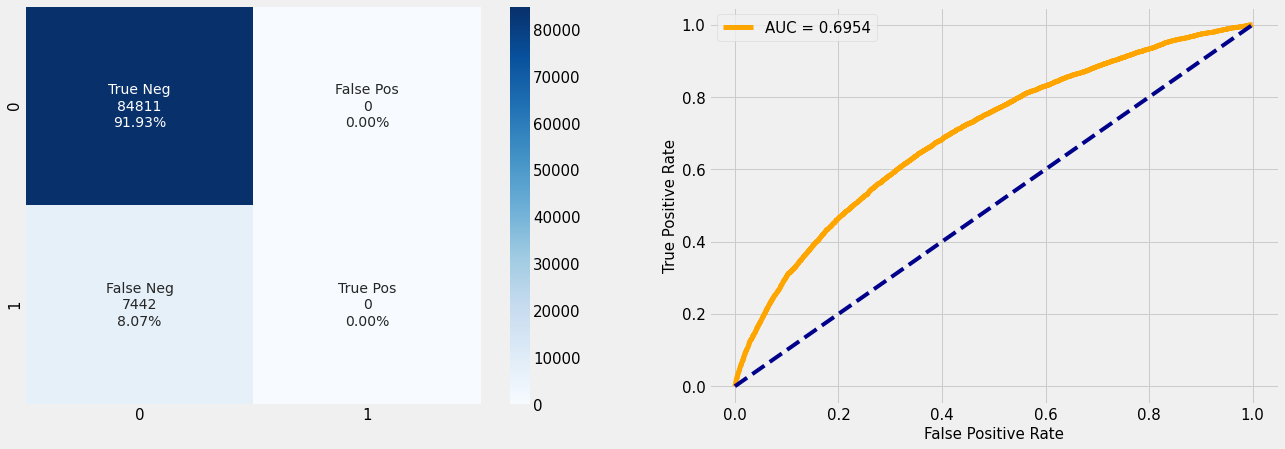

In [21]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1], feature_importances=None)

Notons un fort déséquilibre entre la précision trouvée pour la Target 0 (0.92) et la Target 1 (0). Pour rappel, l'échantillon de travail n'est pas équilibré, avec 92% des individus classés en modalité 0 et 8% en modalité 1, à savoir en défaut de paiement de crédit..

Il est donc intéressant de travailler cet Oversampling (ou suréchantillonnage en français) en ajustant la distribution de classe de manière à avoir une répartition plus égalitaire.

**Oversampling Data Using SMOTE**

SMOTE with Imbalance Data using imblearn module

In [22]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: TARGET    17383
dtype: int64 
Label 0, Before using SMOTE: TARGET    197871
dtype: int64 


In [23]:
%%time
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Wall time: 13.9 s


In [24]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_res==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_res==0)))

Label 1, After using SMOTE: TARGET    197871
dtype: int64
Label 0, After using SMOTE: TARGET    197871
dtype: int64


Class 0: TARGET
0.00      197871
dtype: int64
Class 1: TARGET
1.00      17383
dtype: int64


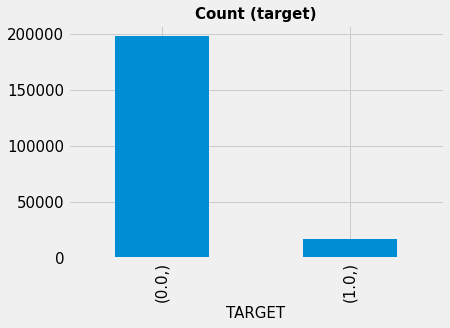

In [25]:
import numpy as np
import pandas as pd

data_train
target_count= y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

target_count.plot(kind='bar', title='Count (target)');

In [26]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()

In [27]:
# Divide by class
#df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_0 = y_train[y_train["TARGET"] == 0]
df_class_1 = y_train[y_train["TARGET"] == 1]

Random over-sampling:
1.00    197871
0.00    197871
Name: TARGET, dtype: int64


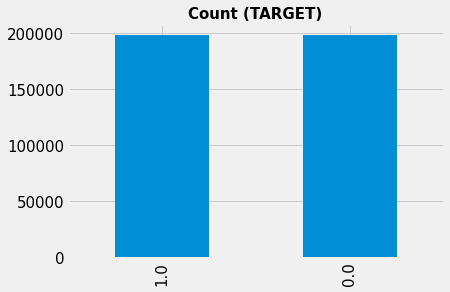

In [28]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TARGET.value_counts())

df_test_over.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [29]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train_res, y_train_res)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test)))

AUC : 0.7191
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.79     84811
         1.0       0.15      0.64      0.24      7442

    accuracy                           0.67     92253
   macro avg       0.55      0.66      0.52     92253
weighted avg       0.89      0.67      0.75     92253

Wall time: 8.91 s


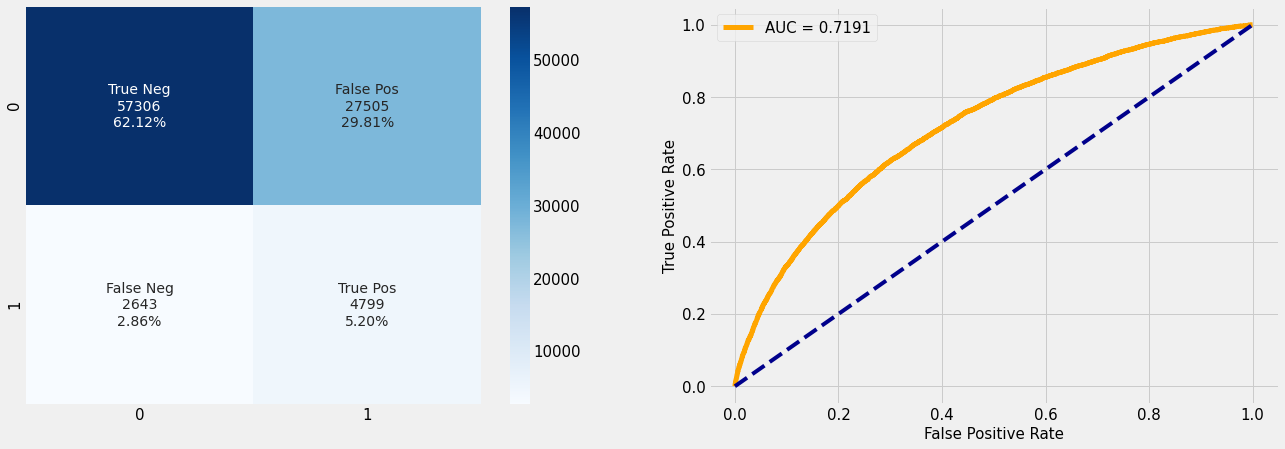

In [30]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1], feature_importances=None)

Amélioration de l'AUC score 0.72 que nous prendrons comme baseline de travail pour la suite des essais…

In [31]:
## Undersampling

In [32]:
print("Label 1, Before using Undersampling: {} ".format(sum(y_train==1)))
print("Label 0, Before using Undersampling: {} ".format(sum(y_train==0)))

Label 1, Before using Undersampling: TARGET    17383
dtype: int64 
Label 0, Before using Undersampling: TARGET    197871
dtype: int64 


In [33]:
# undersampling by hand...

ind1 = y_train[y_train["TARGET"] == 1].index
ind0 = y_train[y_train["TARGET"] == 0].sample(len(ind1)).index

samp_ind = list(set(list(ind0)+list(ind1)))

X_train_undersamp = X_train.loc[samp_ind]
y_train_undersamp = y_train.loc[samp_ind]

In [34]:
print("Label 1, After using Undersampling: {}".format(sum(y_train_undersamp==1)))
print("Label 0, After using Undersampling: {}".format(sum(y_train_undersamp==0)))

Label 1, After using Undersampling: TARGET    17383
dtype: int64
Label 0, After using Undersampling: TARGET    17383
dtype: int64


In [35]:
X_train_undersamp.shape, y_train_undersamp.shape

((34766, 308), (34766, 1))

Random under-sampling:
1.00    17383
0.00    17383
Name: TARGET, dtype: int64


<AxesSubplot:title={'center':'Count (TARGET)'}>

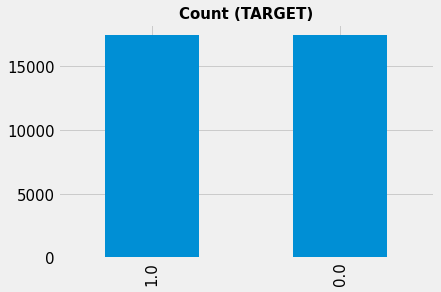

In [36]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)')

In [37]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train_undersamp, y_train_undersamp)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test)))

AUC : 0.6855
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     84811
         1.0       0.13      0.66      0.22      7442

    accuracy                           0.61     92253
   macro avg       0.54      0.64      0.48     92253
weighted avg       0.89      0.61      0.70     92253

Wall time: 636 ms


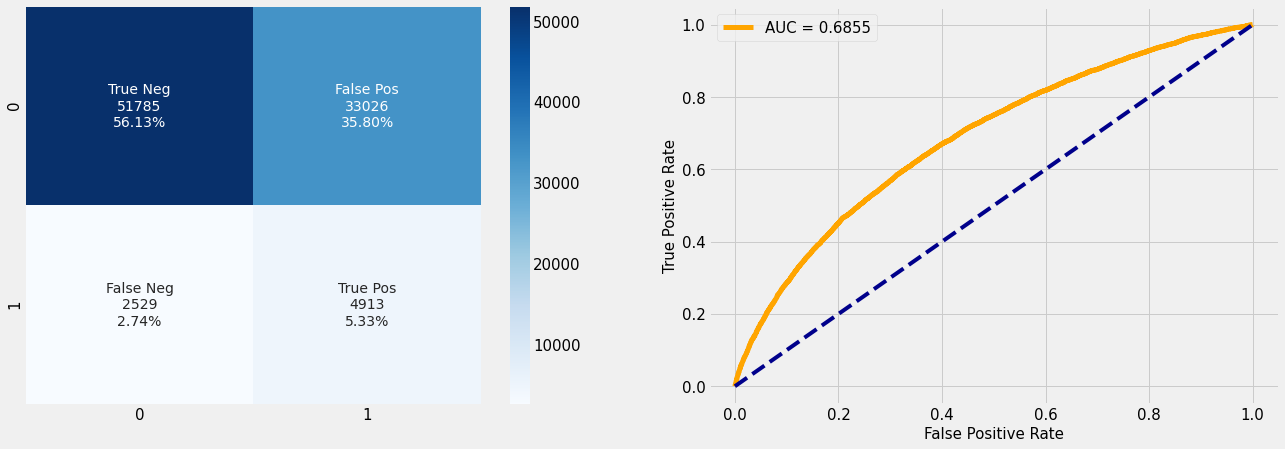

In [38]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1], feature_importances=None)

# GRADIENT BOOSTING

In [39]:
#Predictive Models

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


models = [LGBMClassifier(),
          XGBClassifier()]

In [40]:
def train_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test)),
      'Precision': precision_score(y_test, model.predict(X_test)),
      'Recall': recall_score(y_test, model.predict(X_test)),
      'F1': f1_score(y_test, model.predict(X_test))
      }
          
    return output

In [41]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [42]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train, X_test, y_train, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
base_models = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
base_models.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
base_models.sort_values('AUC', ascending=False, inplace=True)

[14:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2min 34s


In [43]:
base_models

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.92,0.56,0.03,0.05,12.33
1,XGBClassifier,0.77,0.92,0.47,0.05,0.10,141.81


In [44]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test)))

AUC : 0.7718
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.56      0.03      0.05      7442

    accuracy                           0.92     92253
   macro avg       0.74      0.51      0.50     92253
weighted avg       0.89      0.92      0.88     92253

Wall time: 12.9 s


Nous allons comparer une nouvelle fois nos modèles, cette fois-ci l'entrainement se fera avec les données SMOTE.

In [45]:
import re
X_train_res = X_train_res.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [46]:

%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train_res, X_test, y_train_res, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
models_res = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T        
models_res.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']

[14:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 6min 7s


In [47]:
models_res

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.75,0.92,0.52,0.02,0.04,28.69
1,XGBClassifier,0.76,0.92,0.45,0.05,0.09,339.15


In [48]:
base_models

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.92,0.56,0.03,0.05,12.33
1,XGBClassifier,0.77,0.92,0.47,0.05,0.10,141.81


In [49]:
X_train_res.shape

(395742, 308)

In [50]:
y_train_res.shape

(395742, 1)

In [51]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train_res, y_train_res)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test)))

AUC : 0.7517
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.52      0.02      0.04      7442

    accuracy                           0.92     92253
   macro avg       0.72      0.51      0.50     92253
weighted avg       0.89      0.92      0.88     92253

Wall time: 31.2 s


In [52]:
## données undersampled

In [53]:
import re
X_train_undersamp = X_train_undersamp.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [54]:

%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train_undersamp, X_test, y_train_undersamp, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
models_undersamp = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T        
models_undersamp.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_undersamp.sort_values('AUC', ascending=False, inplace=True)

[14:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 34.6 s


In [55]:
models_undersamp

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.70,0.17,0.69,0.27,7.98
1,XGBClassifier,0.76,0.70,0.17,0.69,0.27,26.62


In [56]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train_undersamp, y_train_undersamp)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test)))

AUC : 0.7679
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84811
         1.0       0.17      0.69      0.27      7442

    accuracy                           0.70     92253
   macro avg       0.57      0.70      0.54     92253
weighted avg       0.90      0.70      0.77     92253

Wall time: 6.27 s


# FEATURE SELECTION - RECURSIVE FEATURE ELIMINATION

Maintenant que nous avons testé ces 2 modèles, on peut effectuer cette étape avec LGBMClassifier qui permet d'obtenir les meilleurs performances AUC score / Time. À ce stade, nos ensembles de données contiennent 309 features, dont beaucoup peuvent ne pas contenir d'informations utiles. RFECV avec Scikit-learn appliquera une validation croisée pour trouver l'ensemble des features optimal qui maximisera nos performances. Le but est donc d'optimiser la métrique AUC tout en éliminant les features les moins importantes.

In [57]:
%%time
start = time.time()
rfecv = RFECV(estimator=LGBMClassifier(objective='binary'), 
              step=20, 
              cv=StratifiedKFold(5), 
              scoring='roc_auc', 
              verbose=2,
              n_jobs=-1)
rfecv.fit(X_train, y_train)

print('Time Elapsed: {}'.format(time.time()-start))

Fitting estimator with 308 features.
Fitting estimator with 288 features.
Fitting estimator with 268 features.
Fitting estimator with 248 features.
Fitting estimator with 228 features.
Fitting estimator with 208 features.
Time Elapsed: 575.2450098991394
Wall time: 9min 35s


In [58]:
print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected Features: %s" % rfecv.support_[:20])
print("Feature Ranking : %s" % rfecv.ranking_[:20])

Optimal number of features : 188
Selected Features: [ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True]
Feature Ranking : [1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 2 1 3 1]


In [59]:
ranking = pd.DataFrame({'Features': X_train.columns})
ranking['RANK'] = np.asarray(rfecv.ranking_)
ranking.sort_values('RANK', inplace=True)

features_selection = ranking[ranking.RANK == 1]['Features'].to_list()
print(len(features_selection))
print(features_selection)

188
['NAME_CONTRACT_TYPE', 'PREV_APPL_MEAN_DAYS_TERMINATION', 'PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL', 'PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE', 'PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE', 'PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL', 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY', 'PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT', 'EMERGENCYSTATE_MODE_No', 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE', 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT', 'PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM', 'PREV_APPL_MEAN_CARD_MEAN_SK_DPD', 'PREV_APPL_MEAN_CARD_MEAN_SK

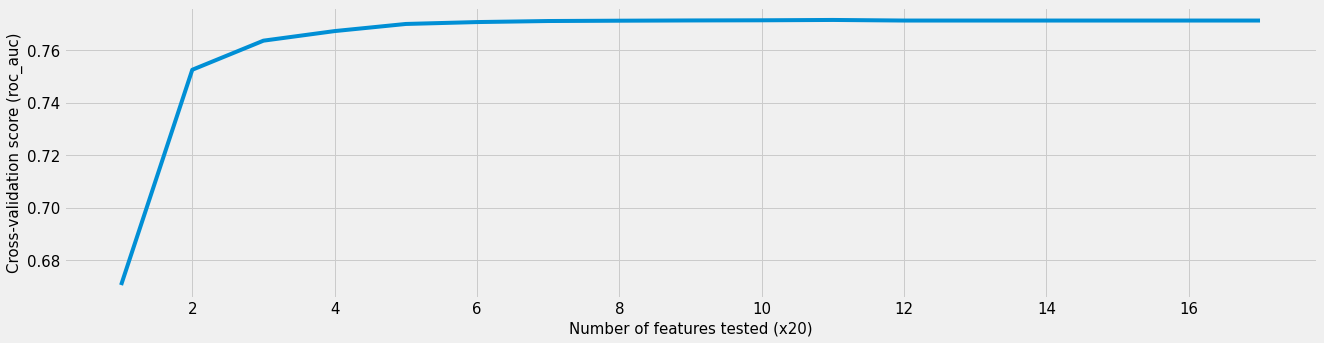

In [60]:
#Plot number of features vs CV scores
step=20
plt.figure(figsize=(20, 5))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel('Number of features tested (x%d)' %step )
plt.ylabel('Cross-validation score (roc_auc)')
show()

In [61]:
#X_data is very important to implement the feature importance plot...
X_data= X_train.loc[:, X_train.columns[rfecv.get_support(indices=True)]]

X_data.shape

(215254, 188)

Il est nécessaire de sauvegarder le dataset X_data de manière à pouvoir le réutiliser facilement…

In [62]:
#Merge operation with TARGET before save this reduced sample
X_data = X_data.merge(TARGET, left_index=True, right_index=True)

In [63]:
X_data.shape

(99267, 189)

In [64]:
%%time
X_data.to_csv("X_data.csv", index=True)

Wall time: 25.6 s


Nous allons sauvegarder deux jeux de données, le premier ci-dessus stocke la totalité des individus en rapport avec les 208 best features identifiées. Le second sera un échantillon permettant, si besoin, d'effectuer des tests plus rapidement, par exemple si l'utilité est nécessaire pour la conception de l'application.

In [65]:
%%time
X_data.sample(30000).to_csv("X_sample_3.csv", index=True)

Wall time: 9.69 s


In [66]:
%%time
X_data.sample(10000).to_csv("X_sample_1.csv", index=True)

Wall time: 3.06 s


In [67]:
#Transform data with rfecv 
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

In [68]:
X_train_selected

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
def train_models(model, X_train_selected, X_test_selected, y_train, y_test):
    models = [
          #Ensemble methods
          LGBMClassifier(device='gpu'),
          XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')
          ]

    model.fit(X_train_selected, y_train)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [70]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train_selected, X_test_selected, y_train, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
models_rfe = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_rfe.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_rfe.sort_values('AUC', ascending=False, inplace=True)

[14:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 56s


In [71]:
#Models performance with features selection
models_rfe

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.92,0.56,0.03,0.05,13.19
1,XGBClassifier,0.77,0.92,0.49,0.05,0.10,102.90


In [72]:
###Reminder before… features selection
base_models

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.92,0.56,0.03,0.05,12.33
1,XGBClassifier,0.77,0.92,0.47,0.05,0.10,141.81


In [73]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train_selected, y_train)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7711
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.56      0.03      0.05      7442

    accuracy                           0.92     92253
   macro avg       0.74      0.51      0.50     92253
weighted avg       0.89      0.92      0.89     92253

Wall time: 12.3 s


In [74]:
# After oversamling and undersammpling:

In [75]:
#oversampling first

In [76]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: TARGET    17383
dtype: int64 
Label 0, Before using SMOTE: TARGET    197871
dtype: int64 


In [77]:
%%time
sm = SMOTE(random_state=2)
X_train_selected_os, y_train_os = sm.fit_resample(X_train_selected, y_train)

Wall time: 11.3 s


In [78]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_os==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_os==0)))

Label 1, After using SMOTE: TARGET    197871
dtype: int64
Label 0, After using SMOTE: TARGET    197871
dtype: int64


In [79]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train_selected_os, y_train_os)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7501
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.49      0.02      0.04      7442

    accuracy                           0.92     92253
   macro avg       0.71      0.51      0.50     92253
weighted avg       0.89      0.92      0.88     92253

Wall time: 25.5 s


In [80]:
#undersampling

In [81]:
print("Label 1, Before using Undersampling: {} ".format(sum(y_train==1)))
print("Label 0, Before using Undersampling: {} ".format(sum(y_train==0)))

Label 1, Before using Undersampling: TARGET    17383
dtype: int64 
Label 0, Before using Undersampling: TARGET    197871
dtype: int64 


In [82]:
X_train_selected.shape

(215254, 188)

In [83]:
X_train_selected = pd.DataFrame(X_train_selected, columns=features_selection)

In [84]:
# undersampling by hand...

ind1 = y_train[y_train["TARGET"] == 1].index
ind0 = y_train[y_train["TARGET"] == 0].sample(len(ind1)).index

samp_ind = list(set(list(ind0)+list(ind1)))

X_train_selected_us = X_train_selected.loc[samp_ind]
y_train_us = y_train.loc[samp_ind]

In [85]:
print("Label 1, After using Undersampling: {}".format(sum(y_train_us==1)))
print("Label 0, After using Undersampling: {}".format(sum(y_train_us==0)))

Label 1, After using Undersampling: TARGET    17383
dtype: int64
Label 0, After using Undersampling: TARGET    17383
dtype: int64


In [86]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train_selected_us, y_train_us)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7685
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84811
         1.0       0.17      0.70      0.27      7442

    accuracy                           0.70     92253
   macro avg       0.57      0.70      0.54     92253
weighted avg       0.90      0.70      0.77     92253

Wall time: 3.77 s


LGBMClassifier reste le modèle le plus performant selon le couple AUC score/Time. XGBClassifier est très rapide, il est en effet plus rapide que le LGBMClassifier mais avec une baisse de l'AUC score.


Dans la dernière partie de l'étude on développera les 3 volets suivants : La fonction coût, l'algorithme d'optimisation et la métrique d'évaluation

# LA FONCTION COUT SERA DETERMINEE PAR L'ANALYSE DES ERREURS DE PREDICTION

FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.

Perte d'opportunité si le crédit client est refusé à tort, alors qu'il aurait été en mesure d'être remboursé.

FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive.

Perte réelle si le crédit client accepté se transforme en défaut de paiement.

Ainsi, les pertes d'un crédit en raison d'une mauvaise classification dépendront des probabilités Faux Positifs et Faux Négatifs.

L'idée est d'éviter les clients avec un fort risque de défaut. Il est donc nécessaire de pénaliser les FP et FN cités précédemment. Pour réduire ce rique de perte financière, il faut maximiser deux critères Recall et Precision.

$$\begin{aligned}{\text{Precision}}&={\frac {tp}{tp+fp}}\\{\text{Recall}}&;={\frac {tp}{tp+fn}}\,\end{aligned}$$
Fonction qui optimise Precision et Recall avec une importance plus forte pour le critère Precision:$$\begin{aligned}{\text{Fscore}}&={\frac {precision.recall}{Beta^2.precision + recall}}\,\end{aligned}$$

Avec Beta le coefficient d'importance relative au critère Precision par rapport au recall :$$\begin{aligned}{\text{Fscore}}&={\frac {precision.recall}{Beta^2.precision + recall}}\,&=(1+Beta^2) . {\frac {tp}{(1+Beta^2).tp + Beta^2.fn + fp}}\,\end{aligned}$$

_Explication sur la F-measure Wikipedia_

L'application de cette métrique métier passe par la quantification de l'importance relative entre recall et précision, à savoir Beta (β). Cela revient à estimer le coût moyen d'un défaut, et le coût d'opportunité d'un client refusé par erreur. Cette connaissance métier n'est pas évoquée à ce stade du projet, nous allons donc l'estimer. Cette hypothèse pourra bien entendu être modifiée avec un interlocuteur métier.

Défaut de paiement 30% du montant du crédit en pertes et autres frais de recouvrement.
10% de chance d'obtenir un crédit pour un client lambda qui souhaite emprunter.
$$\begin{aligned}{\text{Beta}}&={\frac {coef Recall}{coef Precision}}\end{aligned}$$
\ On peut se fixer l'hypothèse d'un Beta = 3. Vérifions-le avec une étape de tests fonctionnels.

In [87]:
#Tests fonctionels avec des listes contenant 4 int: tp, tn, fp, fn
test_0 = [500, 300, 10, 30]
test_1 = [500, 300, 30, 10]
test_2 = [400, 300, 70, 50]
test_3 = [400, 300, 50, 70]
test_4 = [350, 250, 80, 120]
test_5 = [350, 250, 180, 90]

tests = [test_0, test_1, test_2, test_3, test_4, test_5]


def my_score(predictions_success: list) -> int:
    '''scoring fonction'''
    tp, tn, fp, fn = predictions_success
  
    beta = 3
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) 
    fscore = (1+beta)*(tp / ((1+3)*tp + beta*fn + fp))
    
    return 1-fscore

for i, t in enumerate(tests):
    print("############################")
    print("Test", i, ":", t)
    print("Score :", my_score(t))

############################
Test 0 : [500, 300, 10, 30]
Score : 0.04761904761904767
############################
Test 1 : [500, 300, 30, 10]
Score : 0.029126213592232997
############################
Test 2 : [400, 300, 70, 50]
Score : 0.1208791208791209
############################
Test 3 : [400, 300, 50, 70]
Score : 0.13978494623655913
############################
Test 4 : [350, 250, 80, 120]
Score : 0.23913043478260865
############################
Test 5 : [350, 250, 180, 90]
Score : 0.2432432432432432


Les résultats sont satisfaisants, les risques liés aux erreurs de faux négatifs et positifs font ressortir un score plus importants, à l'inverse un dossier présentant moins de risque aura un score proche de zéro.

In [88]:
def custom_score(y_true, y_pred, beta=3) :
    '''function penalize fp and fn…'''
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred).ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    fscore = (1+beta)*((tp / ((1+beta)*tp + beta*fn + fp)))

    return 1-fscore

In [89]:
def cost_false(model, y_true, X_true):
    '''Cost function analyzes prediction errors False Pos. and False Neg.'''
    cm = confusion_matrix(y_true, model.predict(X_true))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

# HYPERPARAMETERS TUNNING - HYPEROPT et AUC SCORE¶


Choisir les hyperparamètres appropriés est nécessaire pour affiner et booster les performances d'un algorithme d’apprentissage automatique. La métrique utilisée dans le contexte de notre classification binaire sera l'AUC score.

Grid Search ou Random Search étaient également une alternative possible, à la différence d'Hyperopt une "méthode basique" ne permet pas de traiter un large espace de paramètres, ici très largement privilégié.

Avec Hyperopt, on peut facilement analyser notre modèle de Boosting tout en variant les hyperparamètres dans l'espace que nous allons définir ci-dessous. Hyperopt fonctionne avec les algorithmes de ML distribué, comme Apache Spark MLlib et Horovod, ainsi qu’avec les modèles ML mono-machine, comme scikit-learn et TensorFlow

In [90]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [91]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

In [92]:
#Parameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.03),
     'max_depth': hp.quniform('max_depth', 3, 7, 1),
    'subsample': hp.uniform('subsample', 0.60, 0.95),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.60, 0.95),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)
    }

In [93]:
# with custom score

In [94]:
def objective(params, eval_metric='custom_score'):
    #objective function to be minimized. 
    #Hyperopt will seek to minimize the loss returned by this function.
    
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_lambda': params['reg_lambda']
        }
  
    
    model= LGBMClassifier(**params)
    cv = StratifiedKFold(5)
    if eval_metric == 'roc_auc':  
        score = cross_val_score(model, X_train_selected, y_train, scoring='roc_auc', cv=cv).mean()

    elif eval_metric == 'custom_score': 
        y_pred = cross_val_predict(model, X_train_selected, y_train, method='predict', cv=cv)
        score = custom_score(y_train, y_pred)
  
    loss = 1 - score    
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [95]:
X_train_selected = pd.DataFrame(X_train_selected, columns=features_selection)

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
%%time
best = fmin(fn=objective, space=space, max_evals=5, rstate=np.random.RandomState(1), algo=tpe.suggest)

100%|██████████████████████████████████████████████████| 5/5 [06:58<00:00, 83.71s/trial, best loss: 0.9777238098653289]
Wall time: 6min 58s


In [98]:
%%time
lgbm = LGBMClassifier( #Fit a new model based on the best parameters
    n_estimators=int(best['n_estimators']), 
    colsample_bytree= best['colsample_bytree'],
    learning_rate= best['learning_rate'],
    max_depth= int(best['max_depth']),
    subsample= best['subsample'],
    reg_lambda= best['reg_lambda'])

lgbm.fit(X_train_selected, y_train)
pickle.dump(lgbm, open(r"C:\Users\dana_\7Projet7\LGBMClassifier.pkl", "wb"))

Wall time: 29.7 s


In [99]:
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.6f' %roc_auc)

AUC : 0.771708


In [100]:
def train_models(model, X_train_selected, X_test_selected, y_train, y_test):
    lgbm.fit(X_train_selected, y_train)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [101]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []


start = time.time()
results = train_models(lgbm, X_train_selected, X_test_selected, y_train, y_test)

name.append(type(lgbm).__name__)
auc.append(results['AUC'])
accuracy.append(results['Accuracy'])
precision.append(results['Precision'])
recall.append(results['Recall'])
f1.append(results['F1'])
time_.append(time.time()-start)

#Initialise data of lists
models_hyperopt = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_hyperopt.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_hyperopt.sort_values('AUC', ascending=False, inplace=True)

Wall time: 39.8 s


In [102]:
#Models performance with features selection
models_hyperopt

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.92,0.65,0.02,0.03,39.83


In [103]:
%%time
lgbm.fit(X_train_selected, y_train)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7717
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.65      0.02      0.03      7442

    accuracy                           0.92     92253
   macro avg       0.78      0.51      0.50     92253
weighted avg       0.90      0.92      0.88     92253

Wall time: 34.7 s


In [104]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba, feature_importances):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if feature_importances : 
        plt.subplot(212)
        indices = np.argsort(model.feature_importances_)[::-1]
    
    features = []
    for i in range(20):
        features.append(X_data.columns[indices[i]]) #After RFECV selection > X_data created

    sns.barplot(x=features, y=model.feature_importances_[indices[range(20)]], color=("orange"))
    plt.xlabel('Features importance')
    plt.xticks(rotation=90)

    show()

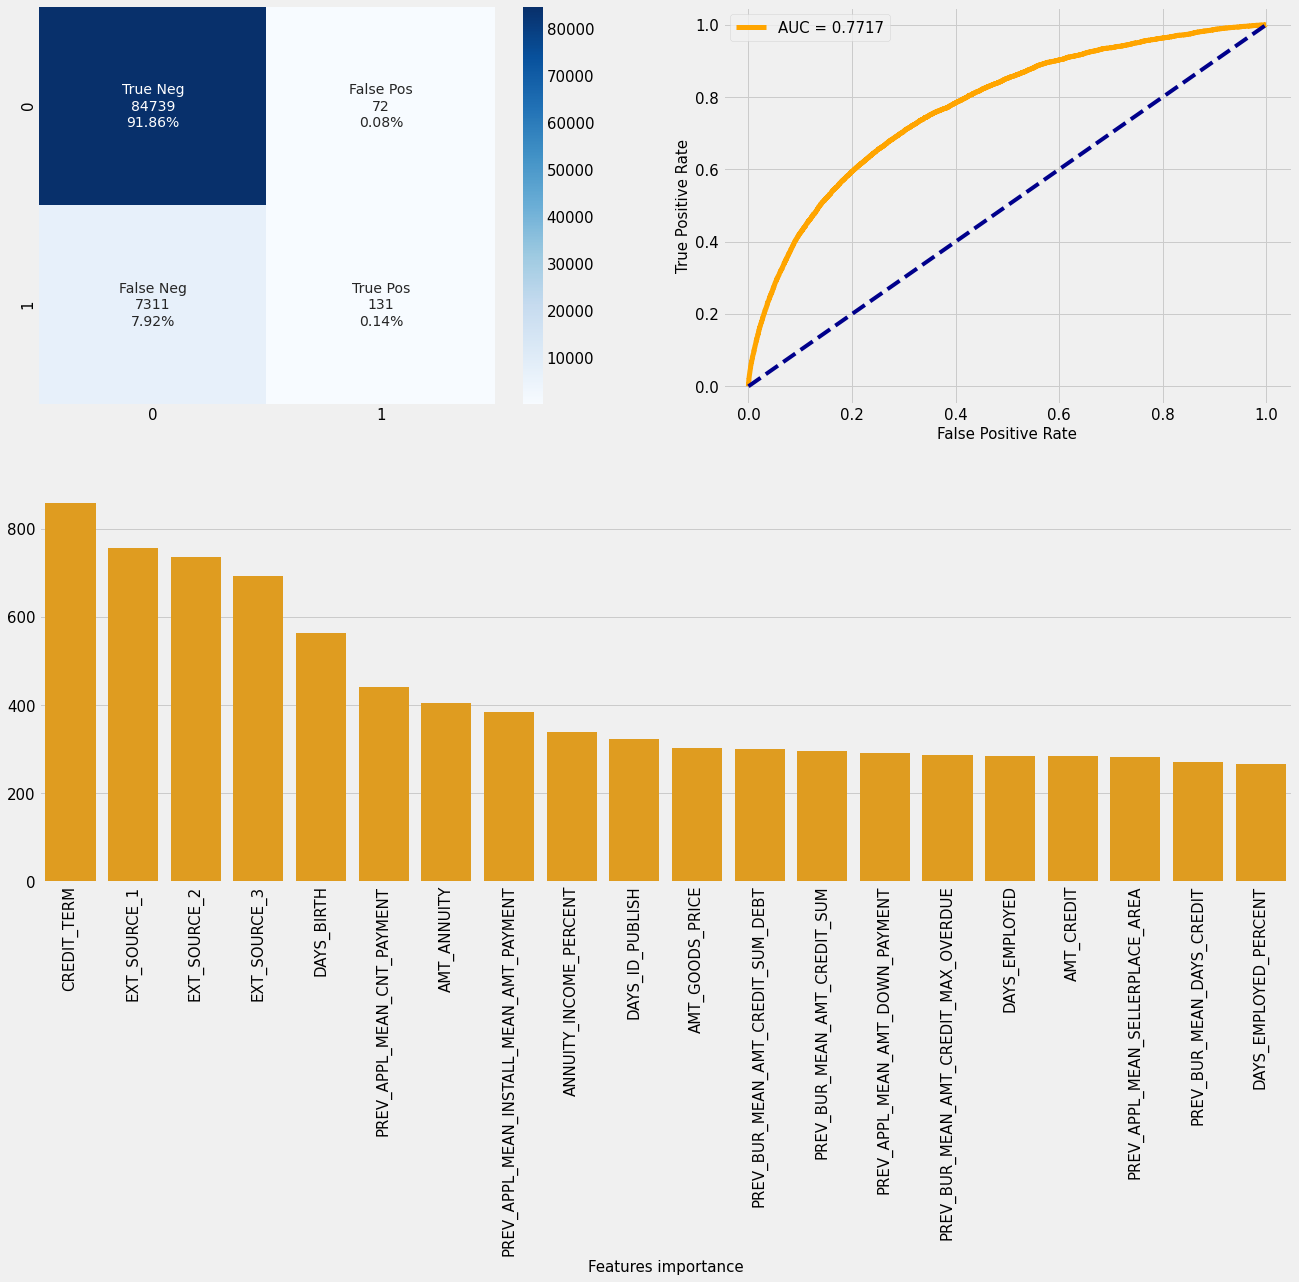

In [105]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [106]:
## FP and FN
cost_false(lgbm, y_test, X_test_selected)

False Pos: 0.08%
False Neg: 7.92%


(0.0007804624239862118, 0.0792494553022666)

In [107]:
#Check list features importance 
sorted_idx = np.argsort(lgbm.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_data.columns[index], lgbm.feature_importances_[index]])

['CREDIT_TERM', 859]
['EXT_SOURCE_1', 756]
['EXT_SOURCE_2', 736]
['EXT_SOURCE_3', 693]
['DAYS_BIRTH', 564]
['PREV_APPL_MEAN_CNT_PAYMENT', 442]
['AMT_ANNUITY', 405]
['PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT', 384]
['ANNUITY_INCOME_PERCENT', 340]
['DAYS_ID_PUBLISH', 324]
['AMT_GOODS_PRICE', 303]
['PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT', 300]
['PREV_BUR_MEAN_AMT_CREDIT_SUM', 295]
['PREV_APPL_MEAN_AMT_DOWN_PAYMENT', 291]
['PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE', 286]
['DAYS_EMPLOYED', 284]
['AMT_CREDIT', 284]
['PREV_APPL_MEAN_SELLERPLACE_AREA', 282]
['PREV_BUR_MEAN_DAYS_CREDIT', 271]
['DAYS_EMPLOYED_PERCENT', 266]
['PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE', 239]
['DAYS_LAST_PHONE_CHANGE', 230]
['PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT', 217]
['PREV_APPL_MEAN_HOUR_APPR_PROCESS_START', 212]
['PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER', 197]
['CREDIT_INCOME_PERCENT', 195]
['DAYS_REGISTRATION', 187]
['CODE_GENDER', 187]
['PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT', 183]
['PREV_APPL_

In [108]:
# After oversamling and undersammpling:

In [109]:
#oversampling first

In [110]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: TARGET    17383
dtype: int64 
Label 0, Before using SMOTE: TARGET    197871
dtype: int64 


In [111]:
%%time
sm = SMOTE(random_state=2)
X_train_selected_os, y_train_os = sm.fit_resample(X_train_selected, y_train)

Wall time: 11.9 s


In [112]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_os==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_os==0)))

Label 1, After using SMOTE: TARGET    197871
dtype: int64
Label 0, After using SMOTE: TARGET    197871
dtype: int64


In [113]:
%%time
lgbm.fit(X_train_selected_os, y_train_os)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7224
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84811
         1.0       0.38      0.02      0.03      7442

    accuracy                           0.92     92253
   macro avg       0.65      0.51      0.49     92253
weighted avg       0.88      0.92      0.88     92253

Wall time: 54.4 s


In [114]:
def train_models(model, X_train_selected_os, X_test_selected, y_train_os, y_test):
    lgbm.fit(X_train_selected_os, y_train_os)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [115]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []


start = time.time()
results = train_models(lgbm, X_train_selected_os, X_test_selected, y_train_os, y_test)

name.append(type(lgbm).__name__)
auc.append(results['AUC'])
accuracy.append(results['Accuracy'])
precision.append(results['Precision'])
recall.append(results['Recall'])
f1.append(results['F1'])
time_.append(time.time()-start)

#Initialise data of lists
models_hyperopt_os = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_hyperopt_os.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_hyperopt_os.sort_values('AUC', ascending=False, inplace=True)

Wall time: 59.6 s


In [116]:
#Models performance with features selection
models_hyperopt_os

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.72,0.92,0.38,0.02,0.03,59.63


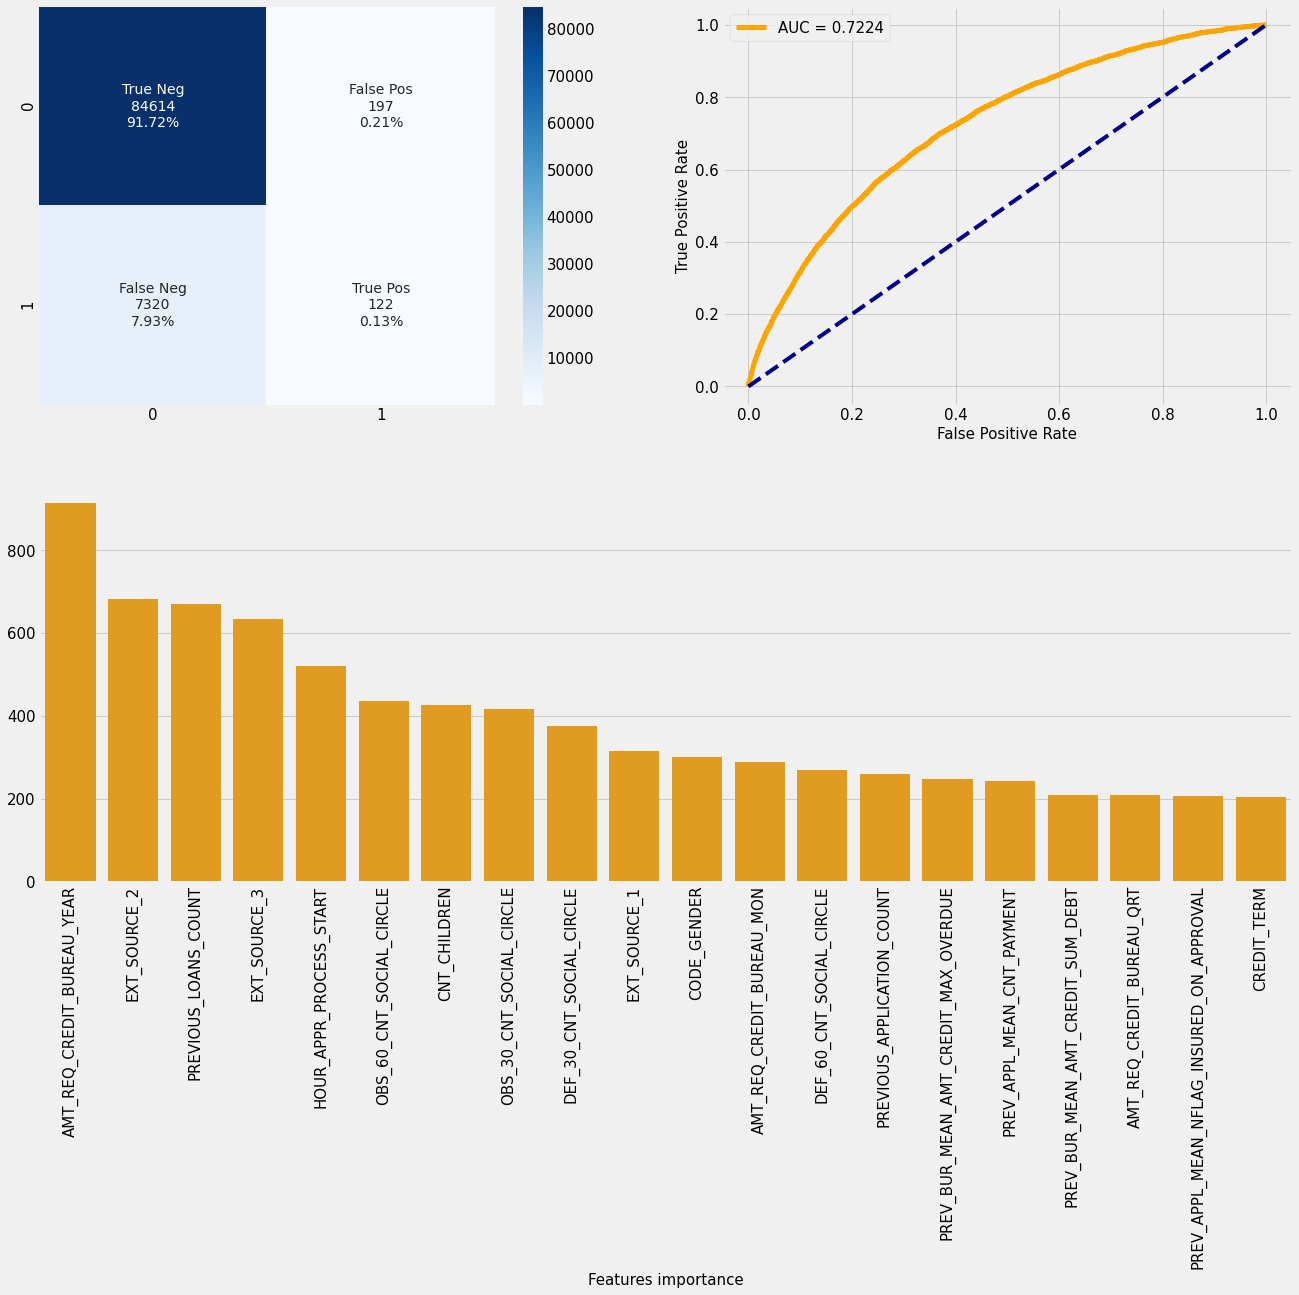

In [117]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [118]:
#undersampling

In [119]:
print("Label 1, Before using Undersampling: {} ".format(sum(y_train==1)))
print("Label 0, Before using Undersampling: {} ".format(sum(y_train==0)))

Label 1, Before using Undersampling: TARGET    17383
dtype: int64 
Label 0, Before using Undersampling: TARGET    197871
dtype: int64 


In [120]:
# undersampling by hand...

ind1 = y_train[y_train["TARGET"] == 1].index
ind0 = y_train[y_train["TARGET"] == 0].sample(len(ind1)).index

samp_ind = list(set(list(ind0)+list(ind1)))

X_train_selected_us = X_train_selected.loc[samp_ind]
y_train_us = y_train.loc[samp_ind]

In [121]:
print("Label 1, After using Undersampling: {}".format(sum(y_train_us==1)))
print("Label 0, After using Undersampling: {}".format(sum(y_train_us==0)))

Label 1, After using Undersampling: TARGET    17383
dtype: int64
Label 0, After using Undersampling: TARGET    17383
dtype: int64


In [122]:
%%time
lgbm.fit(X_train_selected_us, y_train_us)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7683
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84811
         1.0       0.17      0.70      0.27      7442

    accuracy                           0.70     92253
   macro avg       0.57      0.70      0.54     92253
weighted avg       0.90      0.70      0.77     92253

Wall time: 11.3 s


In [123]:
def train_models(model, X_train_selected_us, X_test_selected, y_train_us, y_test):
    lgbm.fit(X_train_selected_us, y_train_us)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [124]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []


start = time.time()
results = train_models(lgbm, X_train_selected_us, X_test_selected, y_train_us, y_test)

name.append(type(lgbm).__name__)
auc.append(results['AUC'])
accuracy.append(results['Accuracy'])
precision.append(results['Precision'])
recall.append(results['Recall'])
f1.append(results['F1'])
time_.append(time.time()-start)

#Initialise data of lists
models_hyperopt_us = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_hyperopt_us.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_hyperopt_us.sort_values('AUC', ascending=False, inplace=True)

Wall time: 15.6 s


In [125]:
#Models performance with features selection
models_hyperopt_us

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.77,0.70,0.17,0.70,0.27,15.65


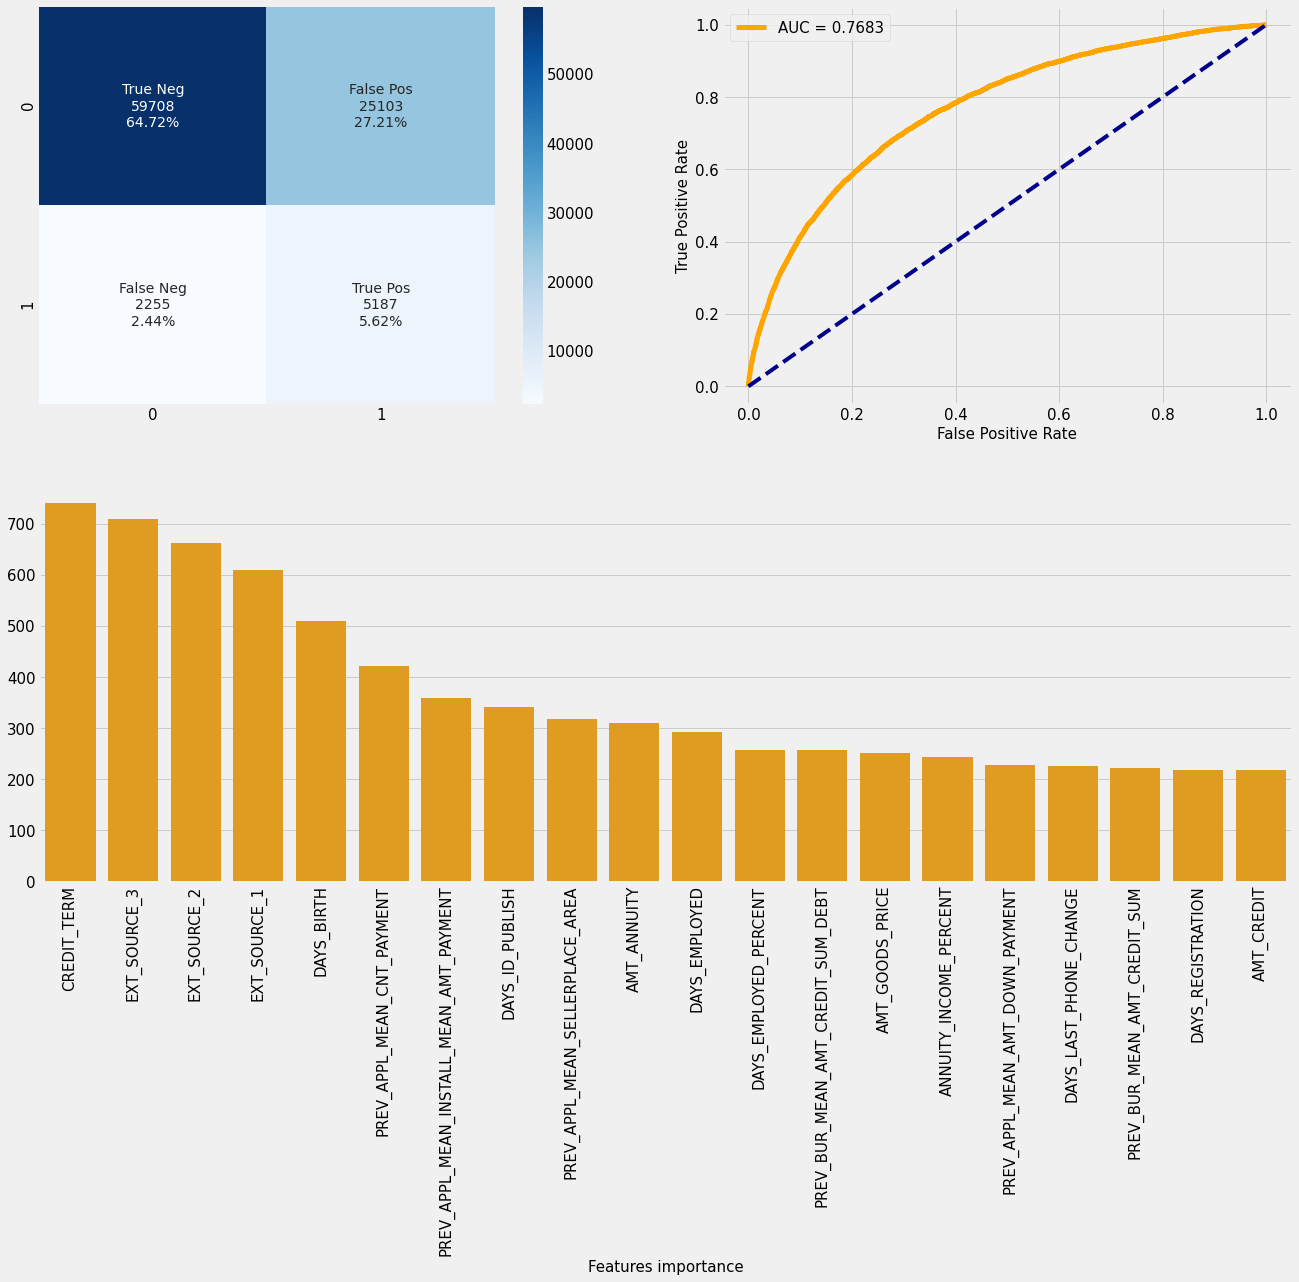

In [126]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [127]:
# with ROC-AUC

In [128]:
def objective(params, eval_metric='roc_auc'):
  #objective function to be minimized. 
  #Hyperopt will seek to minimize the loss returned by this function.

    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_lambda': params['reg_lambda'],
        'device':'gpu'}
  
    
    model= LGBMClassifier(**params)
    cv = StratifiedKFold(5)
    if eval_metric == 'roc_auc': 
        score = cross_val_score(model, X_train_selected, y_train, scoring='roc_auc', cv=cv).mean()

    elif eval_metric == 'custom_score': 
        y_pred = cross_val_predict(model, X_train_selected, y_train, method='predict', cv=cv)
        score = custom_score(y_train, y_pred)
  
    loss = 1 - score    
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [133]:
%%time
best = fmin(fn=objective, space=space, max_evals=5, rstate=np.random.RandomState(1), algo=tpe.suggest)

100%|█████████████████████████████████████████████████| 5/5 [11:00<00:00, 132.09s/trial, best loss: 0.2349792610306396]
Wall time: 11min


In [134]:
%%time
lgbm = LGBMClassifier( #Fit a new model based on the best parameters
    n_estimators=int(best['n_estimators']), 
    colsample_bytree= best['colsample_bytree'],
    learning_rate= best['learning_rate'],
    max_depth= int(best['max_depth']),
    subsample= best['subsample'],
    reg_lambda= best['reg_lambda'],
    device='gpu')

lgbm.fit(X_train_selected, y_train)
#pickle.dump(lgbm, open("/content/gdrive/My Drive/Colab Notebooks/p7_00_models/LGBMClassifier.pkl", "wb"))

Wall time: 43.3 s


LGBMClassifier(colsample_bytree=0.8414186761419945, device='gpu',
               learning_rate=0.013990620009413281, max_depth=4,
               n_estimators=500, reg_lambda=1.2555319596734726,
               subsample=0.8906396542725507)

In [135]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba, feature_importances):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if feature_importances : 
        plt.subplot(212)
        indices = np.argsort(model.feature_importances_)[::-1]
    
    features = []
    for i in range(20):
        features.append(X_data.columns[indices[i]]) #After RFECV selection > X_data created

    sns.barplot(x=features, y=model.feature_importances_[indices[range(20)]], color=("orange"))
    plt.xlabel('Features importance')
    plt.xticks(rotation=90)

    show()

In [136]:
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.6f' %roc_auc)

AUC : 0.764455


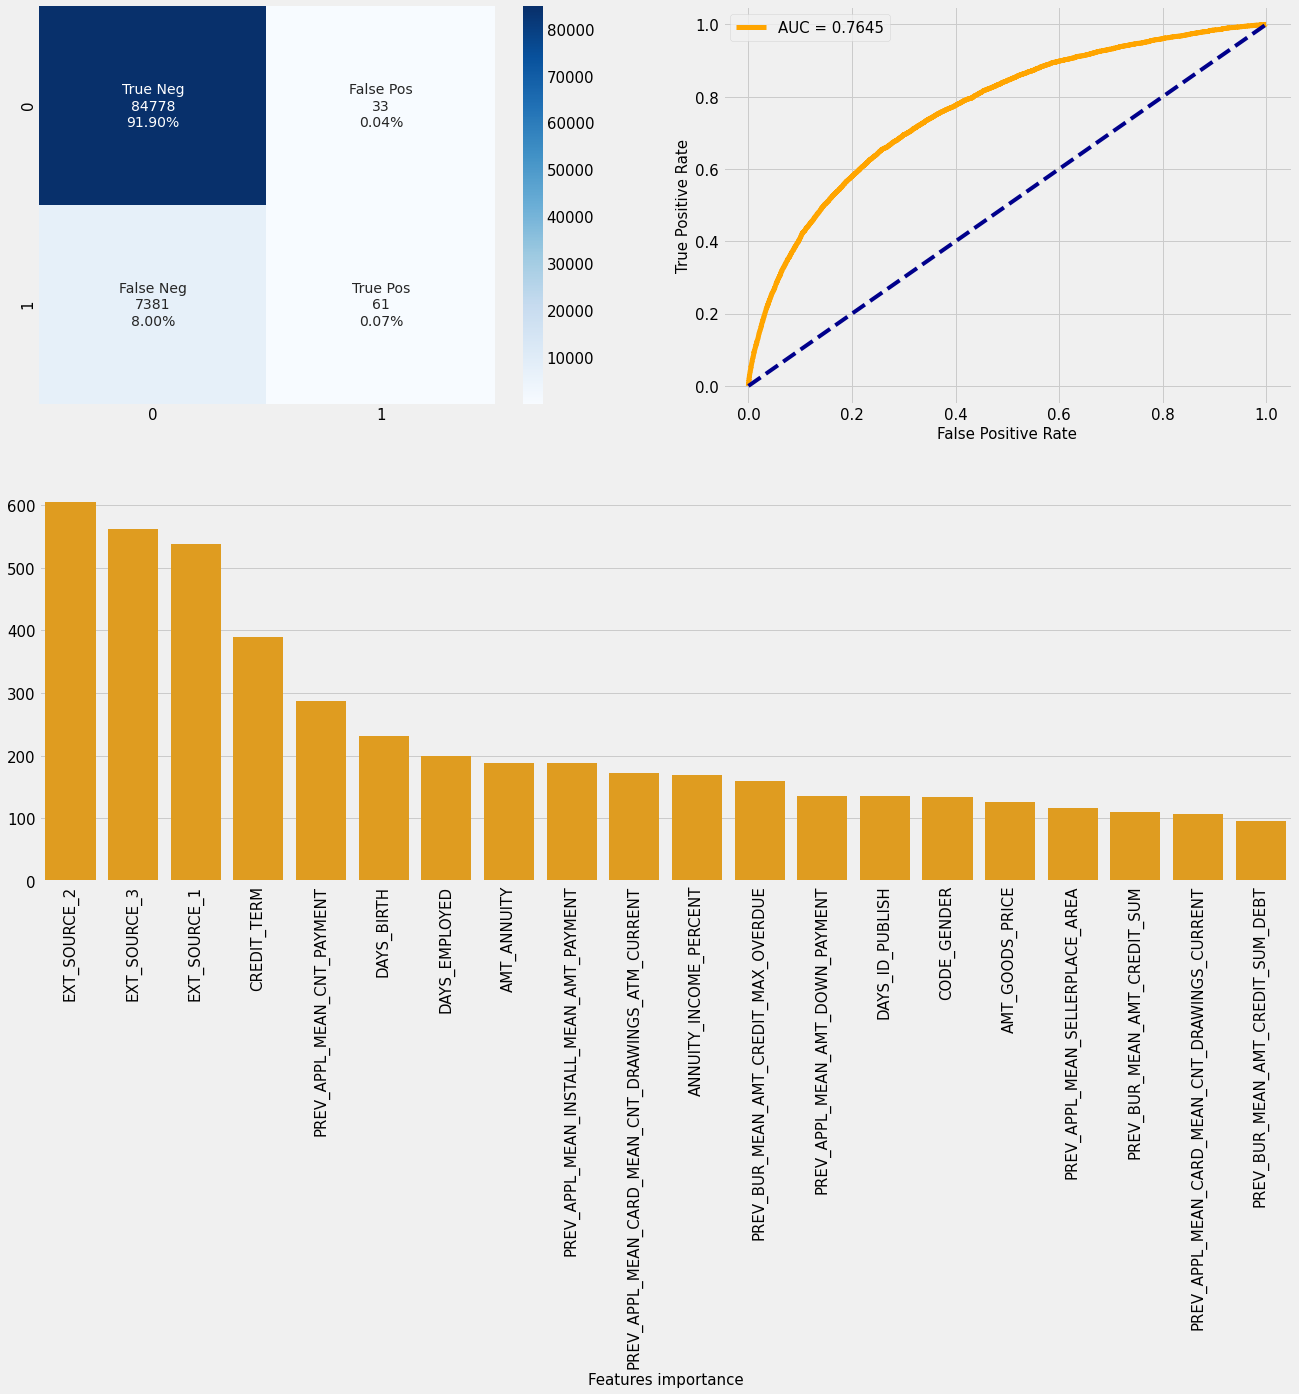

In [137]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [138]:
#FP and FN
cost_false(lgbm, y_test, X_test_selected)

False Pos: 0.04%
False Neg: 8.00%


(0.00035771194432701375, 0.0800082382144754)

In [139]:
#Check list features importance 
sorted_idx = np.argsort(lgbm.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_data.columns[index], lgbm.feature_importances_[index]])

['EXT_SOURCE_2', 604]
['EXT_SOURCE_3', 561]
['EXT_SOURCE_1', 538]
['CREDIT_TERM', 389]
['PREV_APPL_MEAN_CNT_PAYMENT', 287]
['DAYS_BIRTH', 231]
['DAYS_EMPLOYED', 199]
['AMT_ANNUITY', 189]
['PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT', 188]
['PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT', 172]
['ANNUITY_INCOME_PERCENT', 169]
['PREV_BUR_MEAN_AMT_CREDIT_MAX_OVERDUE', 159]
['PREV_APPL_MEAN_AMT_DOWN_PAYMENT', 136]
['DAYS_ID_PUBLISH', 136]
['CODE_GENDER', 135]
['AMT_GOODS_PRICE', 127]
['PREV_APPL_MEAN_SELLERPLACE_AREA', 116]
['PREV_BUR_MEAN_AMT_CREDIT_SUM', 110]
['PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT', 107]
['PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT', 96]
['DAYS_EMPLOYED_PERCENT', 92]
['PREV_BUR_MEAN_DAYS_CREDIT', 89]
['NAME_EDUCATION_TYPE_Highereducation', 83]
['AMT_CREDIT', 82]
['PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE', 78]
['CREDIT_INCOME_PERCENT', 76]
['OWN_CAR_AGE', 60]
['PREV_BUR_MEAN_DAYS_CREDIT_UPDATE', 59]
['DAYS_LAST_PHONE_CHANGE', 57]
['PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE', 57]
['D

In [140]:
# After oversamling and undersammpling:

In [141]:
#oversampling first

In [142]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: TARGET    17383
dtype: int64 
Label 0, Before using SMOTE: TARGET    197871
dtype: int64 


In [143]:
%%time
sm = SMOTE(random_state=2)
X_train_selected_os, y_train_os = sm.fit_resample(X_train_selected, y_train)

Wall time: 9.94 s


In [144]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_os==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_os==0)))

Label 1, After using SMOTE: TARGET    197871
dtype: int64
Label 0, After using SMOTE: TARGET    197871
dtype: int64


In [145]:
%%time
lgbm.fit(X_train_selected_os, y_train_os)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.6958
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     84811
         1.0       0.26      0.05      0.08      7442

    accuracy                           0.91     92253
   macro avg       0.59      0.52      0.52     92253
weighted avg       0.87      0.91      0.88     92253

Wall time: 1min 25s


In [146]:
def train_models(model, X_train_selected_os, X_test_selected, y_train_os, y_test):
    lgbm.fit(X_train_selected_os, y_train_os)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [147]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []


start = time.time()
results = train_models(lgbm, X_train_selected_os, X_test_selected, y_train_os, y_test)

name.append(type(lgbm).__name__)
auc.append(results['AUC'])
accuracy.append(results['Accuracy'])
precision.append(results['Precision'])
recall.append(results['Recall'])
f1.append(results['F1'])
time_.append(time.time()-start)

#Initialise data of lists
models_hyperopt_os = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_hyperopt_os.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_hyperopt_os.sort_values('AUC', ascending=False, inplace=True)

Wall time: 1min 21s


In [148]:
#Models performance with features selection
models_hyperopt_os

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.70,0.91,0.26,0.05,0.08,81.17


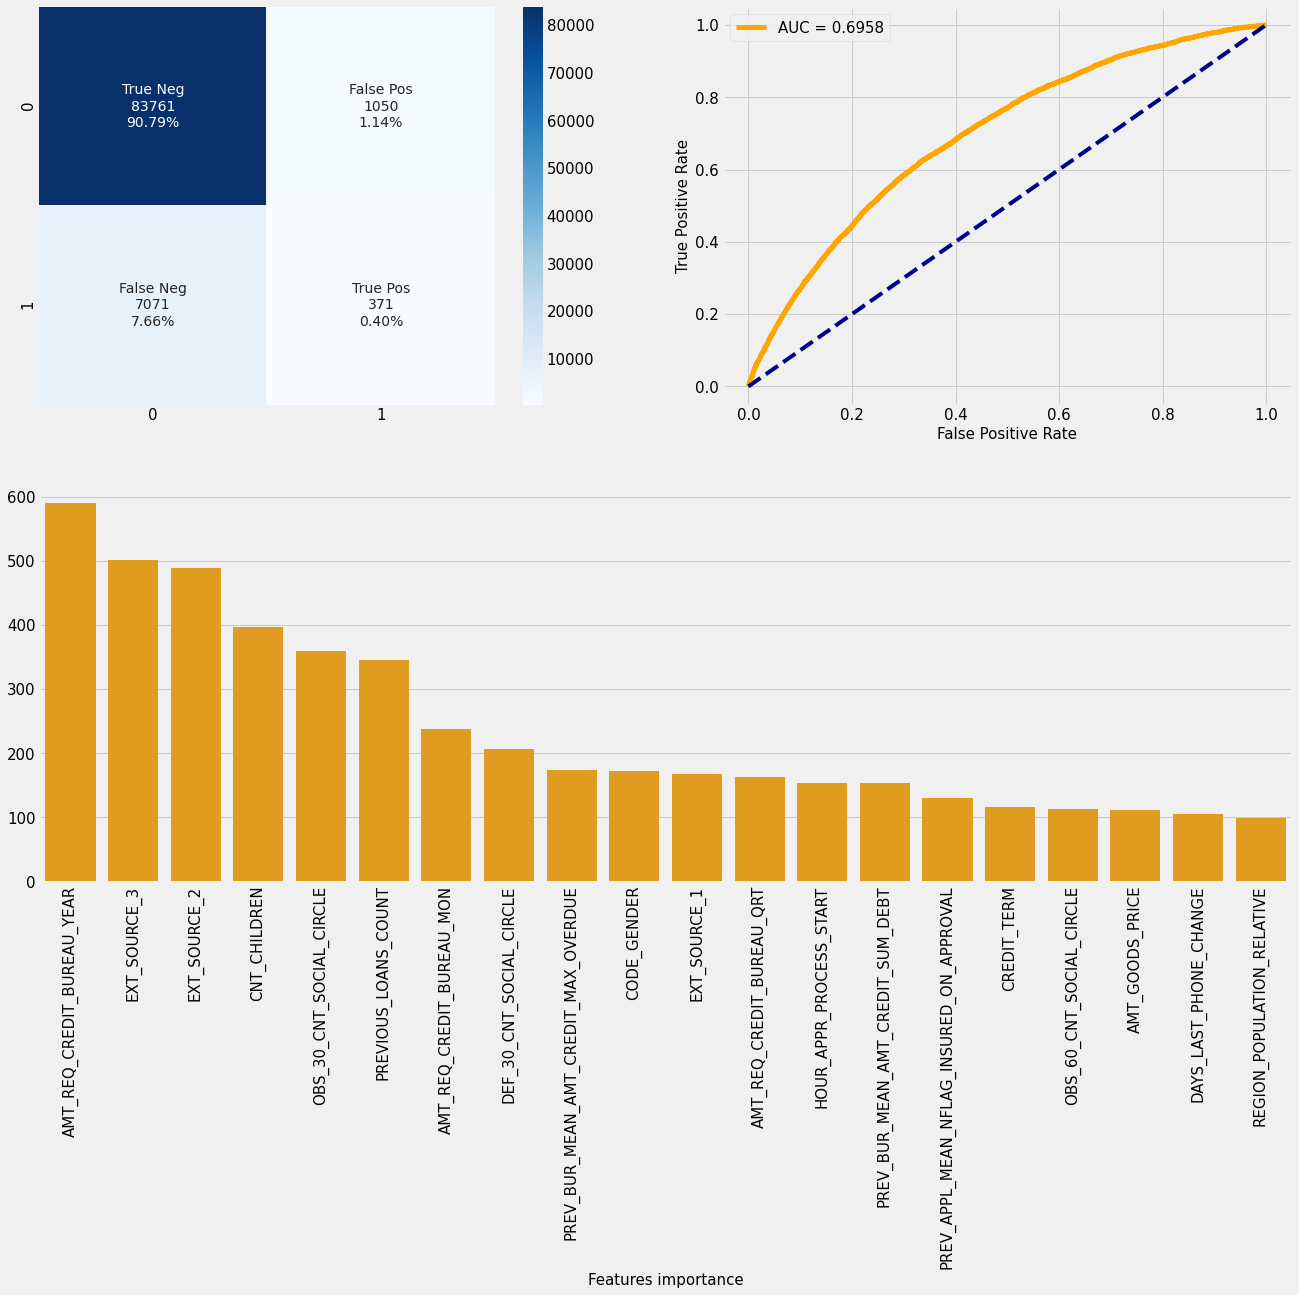

In [149]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [150]:
#undersampling

In [151]:
print("Label 1, Before using Undersampling: {} ".format(sum(y_train==1)))
print("Label 0, Before using Undersampling: {} ".format(sum(y_train==0)))

Label 1, Before using Undersampling: TARGET    17383
dtype: int64 
Label 0, Before using Undersampling: TARGET    197871
dtype: int64 


In [152]:
# undersampling by hand...

ind1 = y_train[y_train["TARGET"] == 1].index
ind0 = y_train[y_train["TARGET"] == 0].sample(len(ind1)).index

samp_ind = list(set(list(ind0)+list(ind1)))

X_train_selected_us = X_train_selected.loc[samp_ind]
y_train_us = y_train.loc[samp_ind]

In [153]:
print("Label 1, After using Undersampling: {}".format(sum(y_train_us==1)))
print("Label 0, After using Undersampling: {}".format(sum(y_train_us==0)))

Label 1, After using Undersampling: TARGET    17383
dtype: int64
Label 0, After using Undersampling: TARGET    17383
dtype: int64


In [154]:
%%time
lgbm.fit(X_train_selected_us, y_train_us)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_selected)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lgbm.predict(X_test_selected)))

AUC : 0.7626
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84811
         1.0       0.17      0.69      0.27      7442

    accuracy                           0.70     92253
   macro avg       0.57      0.70      0.54     92253
weighted avg       0.90      0.70      0.76     92253

Wall time: 16.3 s


In [155]:
def train_models(model, X_train_selected_us, X_test_selected, y_train_us, y_test):
    lgbm.fit(X_train_selected_us, y_train_us)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test_selected)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test_selected)),
      'Precision': precision_score(y_test, model.predict(X_test_selected)),
      'Recall': recall_score(y_test, model.predict(X_test_selected)),
      'F1': f1_score(y_test, model.predict(X_test_selected))
      }
          
    return output

In [156]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []


start = time.time()
results = train_models(lgbm, X_train_selected_us, X_test_selected, y_train_us, y_test)

name.append(type(lgbm).__name__)
auc.append(results['AUC'])
accuracy.append(results['Accuracy'])
precision.append(results['Precision'])
recall.append(results['Recall'])
f1.append(results['F1'])
time_.append(time.time()-start)

#Initialise data of lists
models_hyperopt_us = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
models_hyperopt_us.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_hyperopt_us.sort_values('AUC', ascending=False, inplace=True)

Wall time: 19.9 s


In [157]:
#Models performance with features selection
models_hyperopt_us

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LGBMClassifier,0.76,0.70,0.17,0.69,0.27,19.89


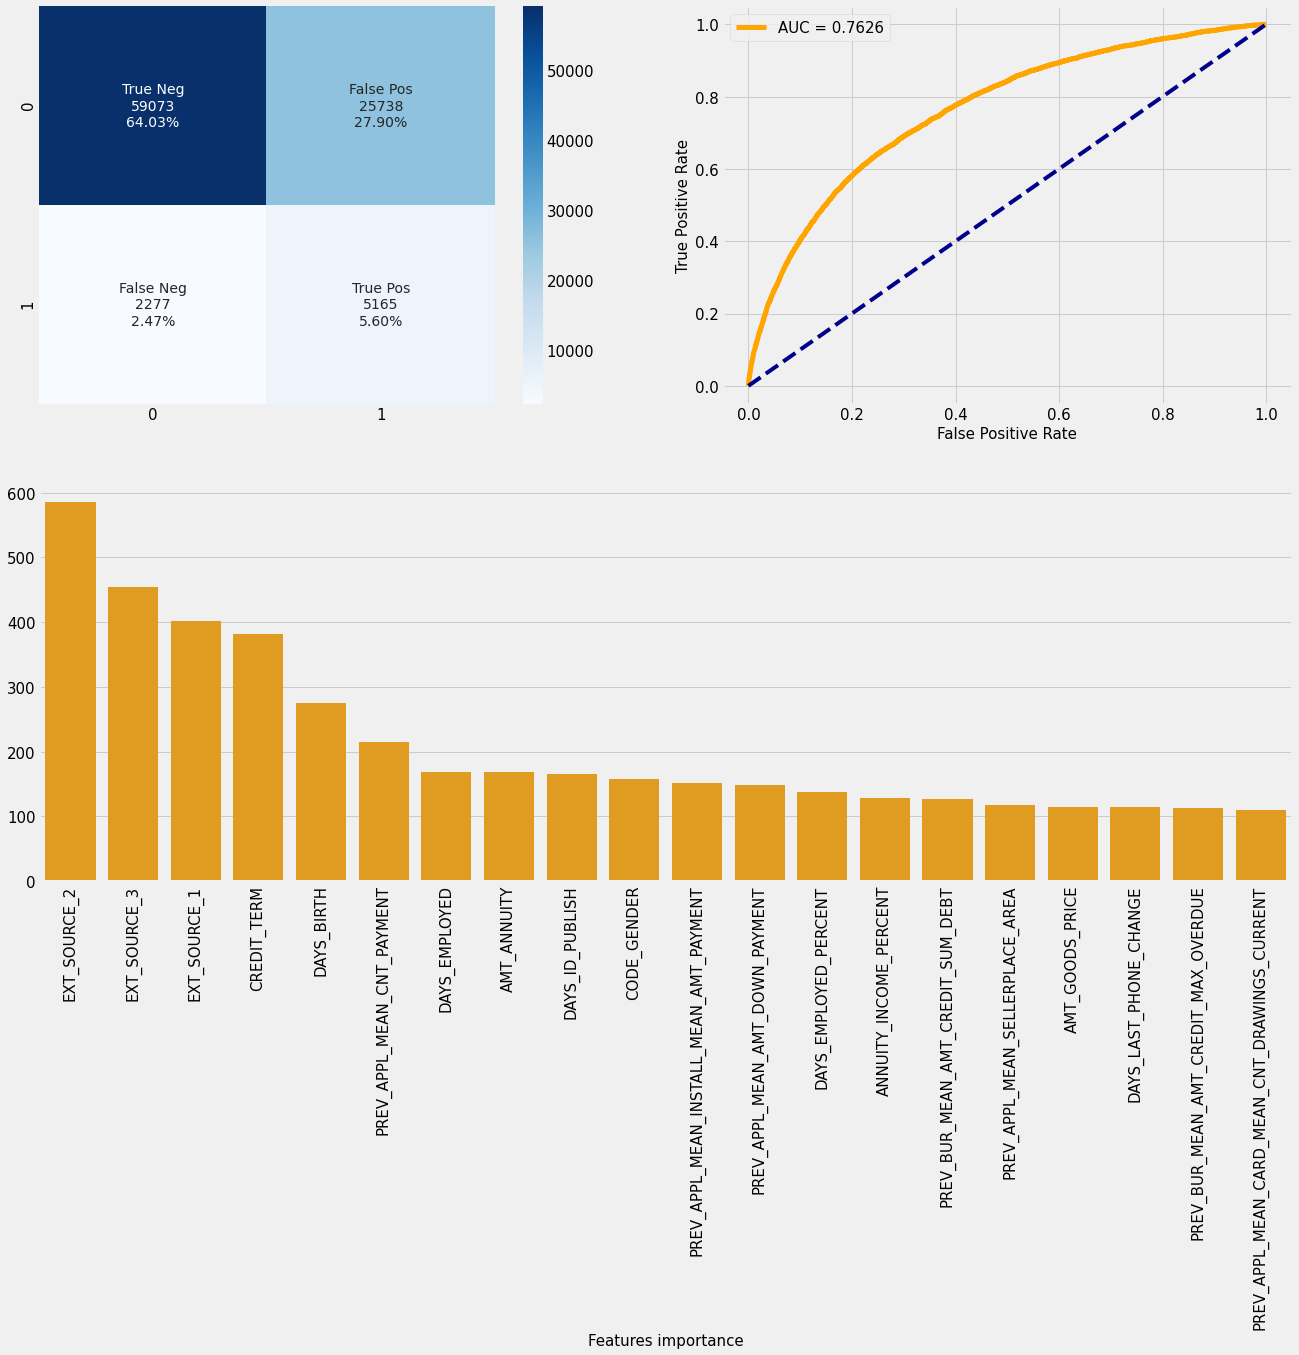

In [158]:
cf_matrix_roc_auc(lgbm, y_test, lgbm.predict(X_test_selected), lgbm.predict_proba(X_test_selected)[:,1], feature_importances=True)

In [159]:
#Shap

In [160]:
# load JS visualization code to notebook
import shap
shap.initjs()

In [161]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

Conclusion Après une baseline faite avec un algorithme simple de régression logistique, l'AUC score avait été estimé ≈ 0.72 avec rééquilibrage (SMOTE) des données. La suite de l'étude a été déroulée vers 2 algorithmes plus complexes de gradient boosting implémentés par LightGbm vs XGBoost. Nous avons pu démontrer les performances de ces algorithmes par une sélection de features, à l'origine 308, après RFECV 188. LightGbm ressort comme étant le plus rapide, le plus performant sur la métrique classique de l'AUC, il a donc été choisi pour l'optimisation des Hyperparamètres (Hyperopt).